# Creating the environment 

## Installing libraries

In [1]:
# Installing modules
# !pip install pixiedust
# !pip install pingouin 

## Importing modules

In [2]:

# Importing libraries
print("Importing libraries ... ")
import pandas as pd
import numpy as np
# import pixiedust
import datetime
import os
import time
import seaborn as sns
import scikitplot as skplt
from scipy import stats
import statsmodels
import statsmodels.api as sm
from scipy.stats import ttest_ind
from statsmodels.stats.power import TTestIndPower
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from scipy.stats.distributions import norm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import *
from pingouin import ancova
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, r2_score, f1_score
print("All modules are ready")




Importing libraries ... 
All modules are ready


## Checking system and setting it up

In [3]:
# Setting up the system

def settings():
    # Display python version and operational system-specif parameters 
    import sys
    print("Python version: ", sys.version, "\n")

    # Check the number of cores and memory usage
    import multiprocessing as mp
    num_cores = mp.cpu_count()
    import psutil
    print("This kernel has ", num_cores, "cores and memory usage of:", psutil.virtual_memory(), "\n")

    # # Check Dask and Hosting the diagnostics dashboard
    # cluster = LocalCluster()
    # client = Client(cluster)
    # client

    # Expands the visualization of a matrix
    pd.set_option("display.max_columns", 500)
    pd.set_option("display.max_rows", 500)
    pd.set_option("display.width", 500)
    
    # Setting a style to seaborn
    sns.set_style("darkgrid")
    
    #Checking the directory we are working on
    import os
    print("File directory", os.getcwd())

settings()

Python version:  3.8.5 (default, Sep  4 2020, 02:22:02) 
[Clang 10.0.0 ] 

This kernel has  8 cores and memory usage of: svmem(total=17179869184, available=817422336, percent=95.2, used=1276973056, free=15163392, active=806133760, inactive=782737408, wired=470839296) 

File directory /Users/celio/Desktop/UofT/Course load/7th_TerM/INF2178H S (Winter) Experimental Design for Data Science/Project/CELIO-RODRIGUESDEOLIVEIRA-MIDTERM


# Data exploration

## ABOUT THE DATASET 


All patients in this study are female at least 21 years old of Pima Indian heritage.

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function (the likelihood of genetic diabetes)
* Age: Age (years)
* Outcome: Class variable (0 for non-diabetic or 1 for diabetic)



## Loading the dataset
Load the data into a data structure (e.g., pandas, or numpy array/matrix)

In [4]:
# reading dataset
file_path = "/Users/celio/Desktop/UofT/Course load/7th_TerM/INF2178H S (Winter) Experimental Design for Data Science/Assignment/"
file_name = "diabetes.csv"
diabetes = pd.read_csv(file_path + file_name)

# printing the first two lines on the dataset
diabetes.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [5]:
# Exploration 1st step
def exploration():
    # Dataset type
    print("- Dataset type is a: ", type(diabetes), "\n")
    
    # Data shape
    print("- The data shape is: ", diabetes.shape, "\n")
    
    # Checking for duplicates
    dup = diabetes.duplicated().sum()
    print("- This dataset has ", dup, "duplicated values\n")
    
    # Column names
    print("- Column names are: ", diabetes.columns)
    

exploration()

- Dataset type is a:  <class 'pandas.core.frame.DataFrame'> 

- The data shape is:  (768, 9) 

- This dataset has  0 duplicated values

- Column names are:  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'], dtype='object')


In [6]:
# Checking null values
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Analyzing 
Which of the predictors are numeric and which are nominal (or categorical)


In [7]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Data exploration shortcut

What is the range of each numeric attribute? What is the mean and standard deviation of each numeric predictor?


In [8]:
obj = type("obj")

for j in diabetes:
    # Passing by categorical variables
    if diabetes[j].dtype == obj:
        diabetes = diabetes
    # Getting data type and range
    else:
        min_val = diabetes[j].min()
        max_val = diabetes[j].max()
        print(j, " is a datatype ", diabetes[j].dtype, " and ranges from ", min_val, " to ", max_val) 


Pregnancies  is a datatype  int64  and ranges from  0  to  17
Glucose  is a datatype  int64  and ranges from  0  to  199
BloodPressure  is a datatype  int64  and ranges from  0  to  122
SkinThickness  is a datatype  int64  and ranges from  0  to  99
Insulin  is a datatype  int64  and ranges from  0  to  846
BMI  is a datatype  float64  and ranges from  0.0  to  67.1
DiabetesPedigreeFunction  is a datatype  float64  and ranges from  0.078  to  2.42
Age  is a datatype  int64  and ranges from  21  to  81
Outcome  is a datatype  int64  and ranges from  0  to  1


In [9]:
# Printing summary statistics of numerical variables
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Exploring the dependent variable

In [10]:
diabetes.Outcome.unique()

array([1, 0])

In [11]:
# Checking unique Diabete results and how many times they appear in the dataset
diabetes["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## Deep dive to find misinformation 

In [12]:
diabetes.Insulin.value_counts()

0      374
105     11
140      9
130      9
120      8
100      7
94       7
180      7
110      6
115      6
135      6
66       5
49       5
56       5
76       5
210      5
90       4
88       4
125      4
71       4
200      4
155      4
64       4
160      4
168      4
165      4
54       4
190      4
36       3
182      3
175      3
106      3
126      3
176      3
145      3
215      3
194      3
156      3
45       3
44       3
325      3
83       3
70       3
63       3
74       3
82       3
50       3
48       3
92       3
75       3
53       2
167      2
170      2
55       2
57       2
58       2
158      2
60       2
67       2
152      2
148      2
95       2
96       2
144      2
18       2
77       2
132      2
23       2
78       2
79       2
122      2
116      2
114      2
85       2
87       2
37       2
40       2
99       2
150      2
220      2
285      2
480      2
495      2
240      2
231      2
230      2
225      2
207      2
205      2
265      2
293      2

# Data Manipulation

The 0 value in "Insulin" is missing for unknown reason. It is known that insulin level should never be zero. Therefore, I decided to replace 0 with the insulin mean. 

In [13]:
diabetes['Insulin']= diabetes['Insulin'].replace(0,diabetes['Insulin'].mean()).astype(int)
diabetes.Insulin.value_counts()

79     376
105     11
130      9
140      9
120      8
100      7
94       7
180      7
110      6
115      6
135      6
49       5
66       5
56       5
76       5
210      5
168      4
54       4
71       4
190      4
64       4
165      4
160      4
200      4
90       4
88       4
155      4
125      4
92       3
70       3
83       3
215      3
106      3
182      3
126      3
75       3
74       3
176      3
175      3
325      3
36       3
156      3
45       3
145      3
194      3
50       3
48       3
82       3
63       3
44       3
150      2
114      2
116      2
192      2
95       2
122      2
148      2
144      2
185      2
96       2
85       2
170      2
132      2
99       2
87       2
158      2
167      2
152      2
225      2
23       2
37       2
480      2
53       2
55       2
57       2
205      2
58       2
293      2
285      2
60       2
495      2
67       2
40       2
265      2
77       2
207      2
220      2
78       2
230      2
231      2
240      2

## Subsampling

Creating a subsample with the first 500 entries

In [14]:
diabetes_subsample = diabetes.drop(diabetes.index[500:])
diabetes_subsample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               500 non-null    int64  
 1   Glucose                   500 non-null    int64  
 2   BloodPressure             500 non-null    int64  
 3   SkinThickness             500 non-null    int64  
 4   Insulin                   500 non-null    int64  
 5   BMI                       500 non-null    float64
 6   DiabetesPedigreeFunction  500 non-null    float64
 7   Age                       500 non-null    int64  
 8   Outcome                   500 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 39.1 KB


In [15]:
diabetes_subsample.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000
mean,3.808000,121.420000,68.754000,20.598000,118.852000,31.979200,0.486084,33.098000,0.36400
std,3.343875,32.441833,19.434528,15.712739,98.626124,8.203006,0.345561,11.628191,0.48163
min,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.078000,21.000000,0.00000
25%,1.000000,100.000000,64.000000,0.000000,79.000000,27.075000,0.252000,24.000000,0.00000
50%,3.000000,117.000000,70.000000,23.000000,79.000000,32.000000,0.384000,29.000000,0.00000
75%,6.000000,142.250000,80.000000,33.000000,122.750000,36.600000,0.637750,39.250000,1.00000
max,17.000000,197.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.00000


In [16]:
dia_age = diabetes_subsample[diabetes_subsample["Outcome"] == 1]
print("The mean Age for having Diabetes is: ", dia_age["Age"].mean())

The mean Age for having Diabetes is:  36.26923076923077


# Plotting

In [17]:
age_dist = diabetes_subsample[["Age", "Outcome"]]
print("Age: ", age_dist.Age.unique())

Age:  [50 31 32 21 33 30 26 29 53 54 34 57 59 51 27 41 43 22 38 60 28 45 35 46
 56 37 48 40 25 24 58 42 44 39 36 23 61 69 62 55 65 47 52 66 49 63 67 72
 81]


/Users/celio/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/Users/celio/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.

/Users/celio/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/Users/celio/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning:

Th

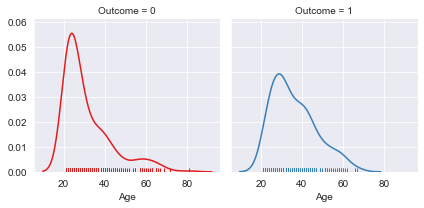

In [18]:
# Density   
g = sns.FacetGrid(data=age_dist, col = "Outcome", hue="Outcome", palette="Set1")
g = (g.map(sns.distplot, "Age", hist=False, rug=True))


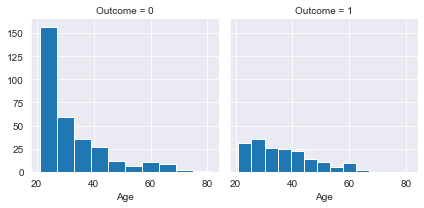

In [19]:
h = sns.FacetGrid(age_dist, col="Outcome")
h.map(plt.hist, "Age");

From the histograms above we can see the non-linear relationship between Age and Outcome (positive diagnostic for diabetes). Therefore, diabettes can be interpreted as either an extrinsic phenomenon or forcefully caused by genetics predisposition. Possible causes might be obesity, inactive lifestyle, pregnancy, environmental factors, etc. 
<br><br>
The mean age for this study is 36 years old. Therefore, it is noticeable that the age is not well balanced with a majority of the population between 20 and 30 years old which makes it harder to analyse critical paths for diabetes diagnostics as well as preventive strategies. 
<br><br>
Moreover, we do not see isolated cases nor outliers what would might happen in a dataset better distributed. 
<br><br>
According to the magnitude density as shown in the scatter plot below it is clearer the concentration of age by the proximity of the dots. Clearly, the density resides in a age group 20-30 years old.

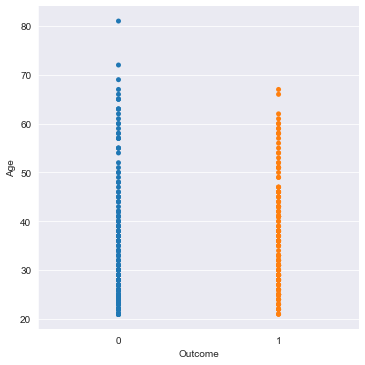

In [20]:
sns.catplot(x="Outcome", y="Age", jitter=False, data=age_dist);

# Correlation Plot

This heat map is based on the whole dataset and Colors are as follows:
<br>
   * Dark Red: Positive correlation,
   * Dark Blue: Negative correlation.

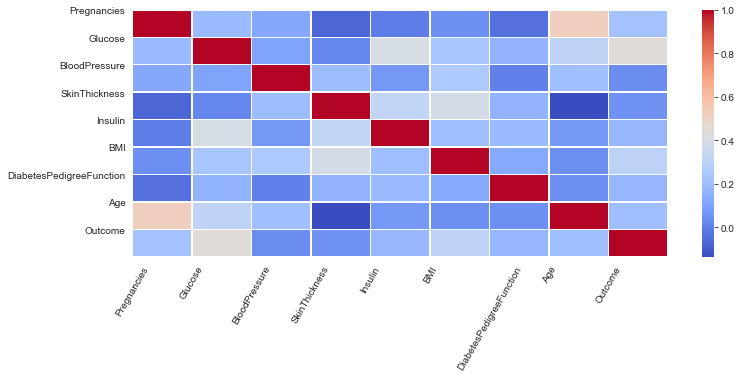

In [21]:
dtset = diabetes_subsample
correlation = diabetes_subsample.corr() # data correlation 
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(212)
sns.heatmap(correlation, ax=ax, cmap="coolwarm", linewidths = 0.5)
# fig.colorbar(cax)
ticks = np.arange(0,len(diabetes_subsample.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=60)
ax.set_yticks(ticks)
ax.set_xticklabels(diabetes_subsample.columns)
ax.set_yticklabels(diabetes_subsample.columns)
plt.show()

From the correlation plot, we infer that there is ...
- a strong negative correlation between:
    - SkinThickness and Age;
    - Pregnancies, Insulin, BMI and DiabetesPedigreeFunction 
<br><br>

    
- a positive correlation between:
    - Pregnancies and Age;
    - Glucose and Outcome (positive diagnostic for Diabetes)

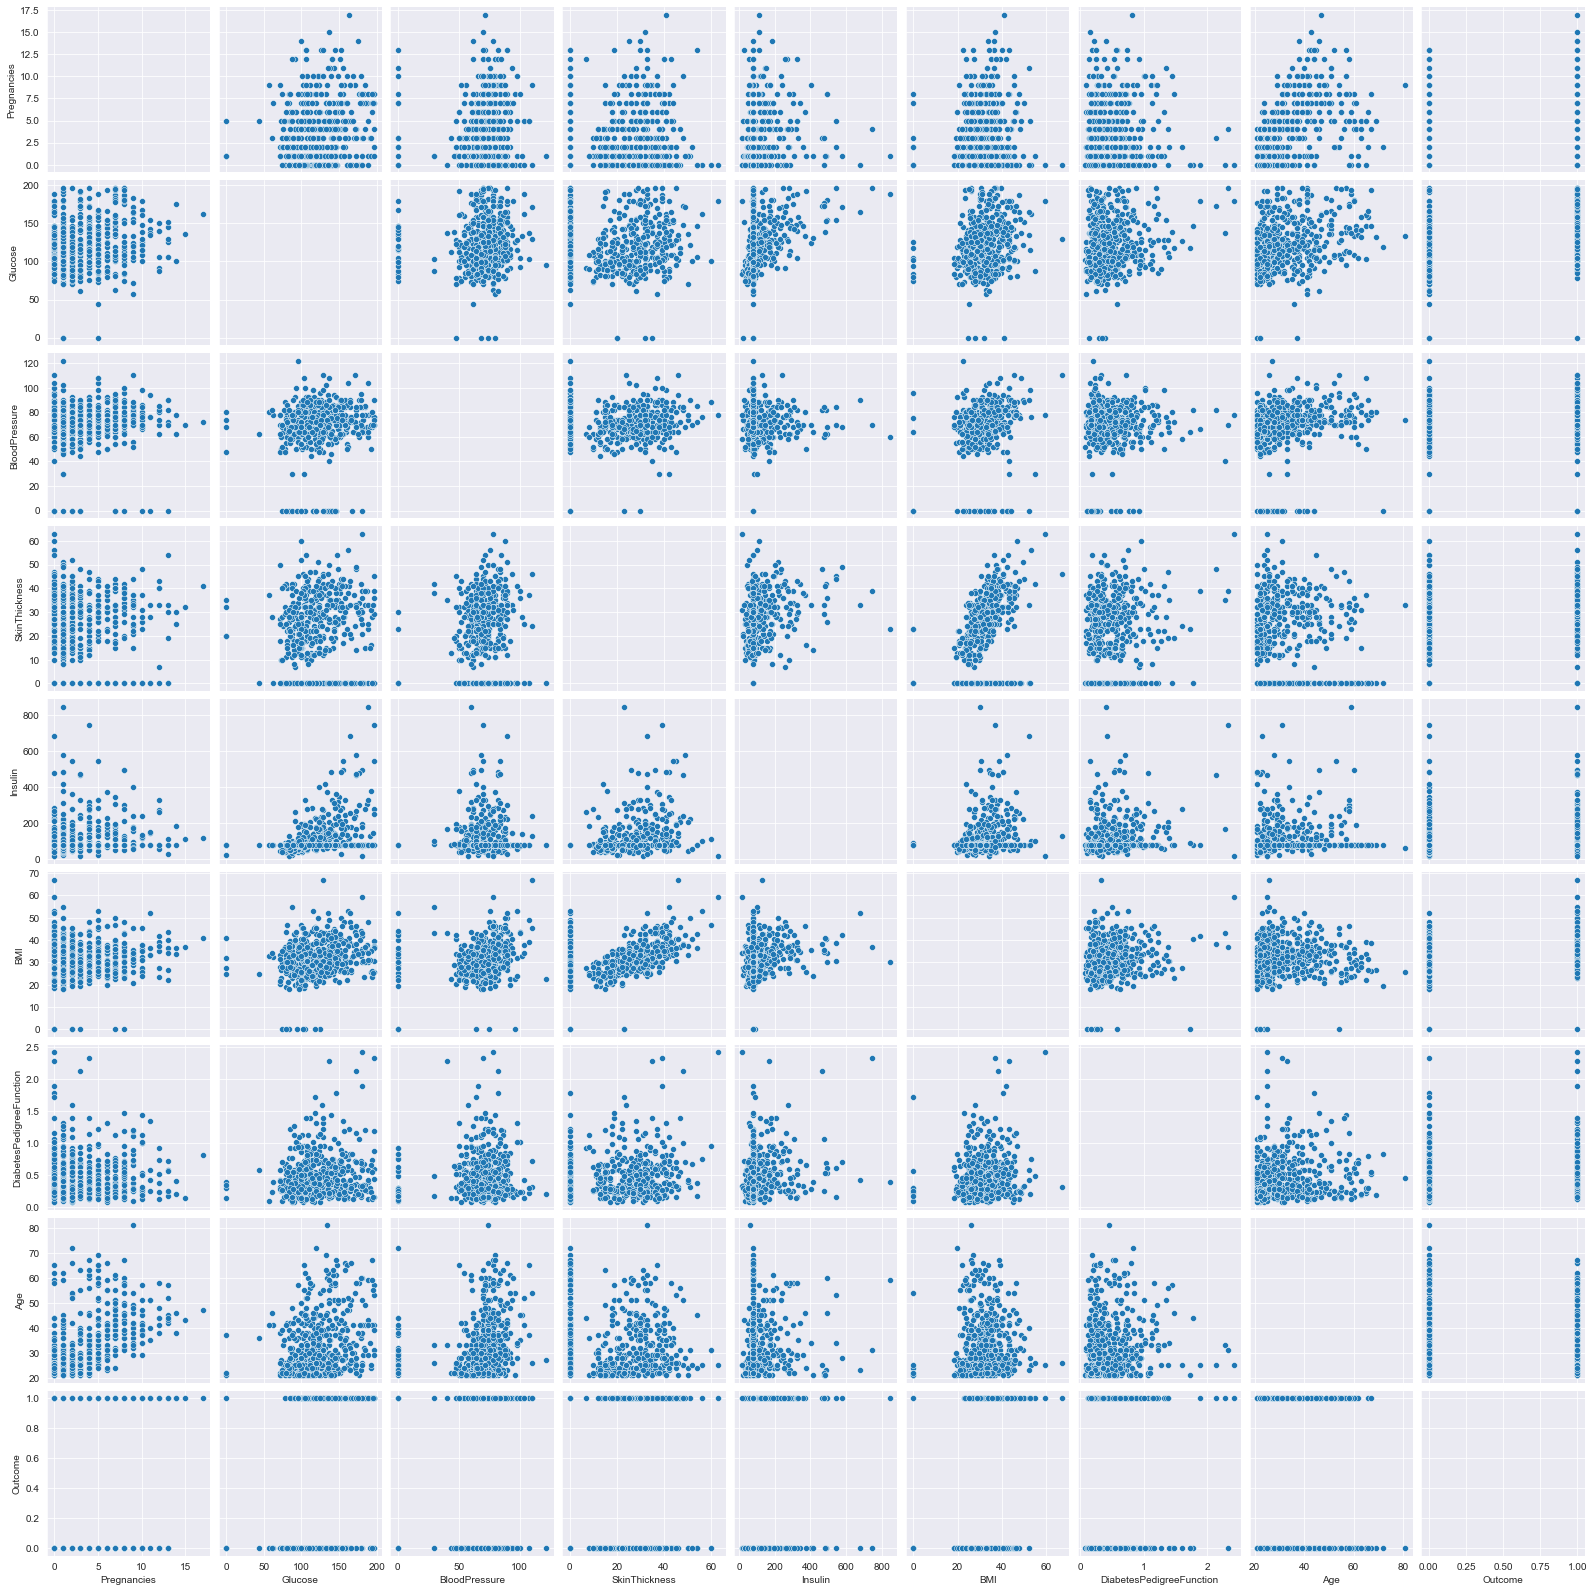

In [22]:
g = sns.pairplot(diabetes_subsample, diag_kind="reg")

## Checking Purity level of nodes using Decision Tree

X_train shape is:  (375, 8)
X_test shape is:  (125, 8)
y_train shape is:  (375,)
y_test shape is:  (125,)


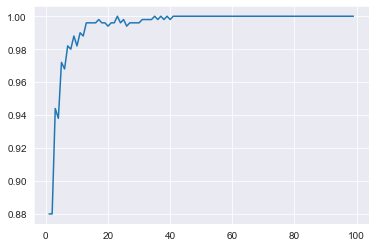

In [23]:
# Splitting the data into independent variables (X) and dependant variable (y)
X = diabetes_subsample.drop(["Outcome"], axis=1)
y = diabetes_subsample["Outcome"]
X_train, X_test, y_train, y_test = X.iloc[:375, :], X.iloc[375:, :], y.iloc[:375], y.iloc[375:]

print("X_train shape is: ", X_train.shape) 
print("X_test shape is: ", X_test.shape) 
print("y_train shape is: ", y_train.shape) 
print("y_test shape is: ", y_test.shape)

#Elbow curve presents the number of nodes/interaction in which subsequent nodes start being pure.

num_trees = range(1, 100)
scores = []
for trees in num_trees:
    rf = RandomForestClassifier(n_estimators = trees, random_state = 30)
    rf.fit(X, y)
    scores.append(rf.score(X, y))
plt.plot(num_trees, scores);

We interpret this graph as reaching a purity level just after 40 nodes' splits.

In [24]:
num_trees = range(1, 100)
scores = []
for trees in num_trees:
    dt = DecisionTreeClassifier(criterion = 'entropy', min_samples_split=10)
    dt.fit(X_train, y_train)
    y_pred =  dt.predict(X_test)
#     scores.append(clf.score(y_pred, y_test))
# plt.plot(num_trees, scores);
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=dt.predict(X_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred))

Accuracy Score on train data:  0.952
Accuracy Score on test data:  0.68


## Feature importance and feature selection for a two-way ANOVA

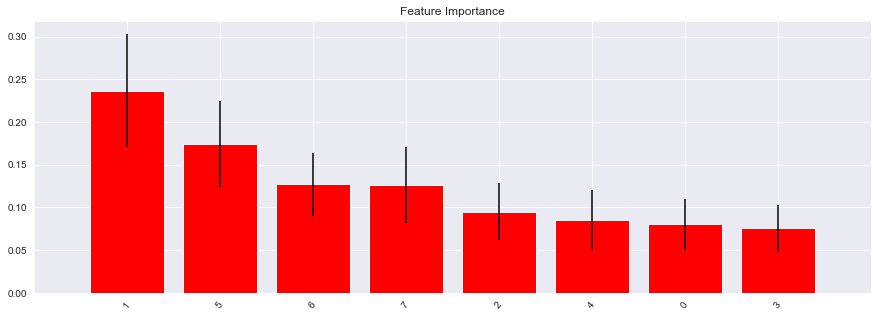

In [25]:
skplt.estimators.plot_feature_importances(rf, figsize = (15, 5), x_tick_rotation = 50);

# Two-way ANOVA

### 1 = Glucose & 5 = BMI

<b>A blood sugar level:</b>
* less than 140 mg/dL (7.8 mmol/L) is normal
* between 140 and 199 mg/dL (7.8 mmol/L and 11.0 mmol/L) indicates prediabetes.
* more than 200 mg/dL (11.1 mmol/L) after two hours indicates diabetes


<b>BMI	Classification: </b>
* 18 or less	Underweight
* 19 - 24	Healthy
* 25 - 29	Overweight
* 30+	Obese

In [26]:
diabetes = diabetes[["Glucose", "BMI", "Outcome"]]
diabetes_anova = diabetes
diabetes_anova.head(2)

,Glucose,BMI,Outcome
0,148,33.6,1
1,85,26.6,0


In [27]:
# to_categorical yeilds a new dataframe with categorical values as follows:
# For Glucose levels:
#     <= 139 replace it with the value "Normal", etc
# For BMI:
#     <= 18, replace it with the value "Underweight", etc

def to_categorical(diabetes_anova):
    """
    to_categorical yeilds a new dataframe with categorical values as follows:
        For Glucose levels:
            <= 139 replace it with the value "Normal", etc
        For BMI:
            <= 18, replace it with the value "Underweight", etc
    Returns a new dataset called diabetes_anova
    """

    for i in range(len(diabetes_anova["Glucose"])):
        if diabetes_anova["Glucose"][i] <= 139 :
            diabetes_anova["Glucose"][i] = "Normal"
        elif (diabetes_anova.Glucose[i] >= 140) & (diabetes_anova.Glucose[i] <= 199) :
            diabetes_anova.Glucose[i] = "Prediabetes"
        elif diabetes_anova["Glucose"][i] >= 200:
            diabetes_anova["Glucose"][i] = "Diabetes"
#     print(diabetes_anova["Glucose"].value_counts())

    for i in range(len(diabetes_anova["BMI"])):
        if diabetes_anova["BMI"][i] <= 18 :
            diabetes_anova["BMI"][i] = "Underweight"
        elif (diabetes_anova.BMI[i] >= 18.1) & (diabetes_anova.BMI[i] <= 24) :
            diabetes_anova.BMI[i] = "Healthy"
        elif (diabetes_anova.BMI[i] >= 24.1) & (diabetes_anova.BMI[i] <= 29.9) :
            diabetes_anova.BMI[i] = "Overweight"
        elif diabetes_anova["BMI"][i] >= 30:
            diabetes_anova["BMI"][i] = "Obese"
#     print(diabetes_anova["BMI"].value_counts())
    return diabetes_anova


In [28]:
df_anova = to_categorical(diabetes_anova)

/Users/celio/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-74e044faa173>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-74e044faa173>:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-74e044faa173>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats 

In [29]:
# Performing two-way ANOVA
anova = smf.ols(
    'Outcome ~ C(Glucose) + C(BMI) +\
    C(Glucose):C(BMI)', data=df_anova).fit()
result = sm.stats.anova_lm(anova, type = 2)
  
# Print the result
print(result)

                      df      sum_sq    mean_sq           F        PR(>F)
C(Glucose)           1.0   29.970841  29.970841  169.986098  3.249630e-35
C(BMI)               3.0    9.583078   3.194359   18.117498  2.305121e-11
C(Glucose):C(BMI)    3.0    0.853081   0.284360    1.612811  1.849685e-01
Residual           761.0  134.174562   0.176313         NaN           NaN


Interpreting the result shows the p-values for each of the factors in the output:

The Glucose p-value is equal to 3.249630e-35
The BMI p-value is equal to 2.305121e-11
The Glucose * BMI: p-value is equal to 1.849685e-01
The p-values for BMI turn out to be less than 0.05 which implies that the means of both the factors possess a statistically significant effect on Diabetes. The p-value for the interaction effect (1.849685e-01) is greater than 0.05 which depicts that there is significant interaction effect between Glucose and BMI.

# Linear Regression

In [30]:
diabetes_lr = diabetes_subsample
X = diabetes_lr.drop(["Outcome"], axis=1)
y = diabetes_lr["Outcome"]


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=22)

In [32]:
reg = LinearRegression().fit(X, y)
reg.score(X, y)
# reg.coef_
# reg.intercept_
# reg.predict(np.array([[3, 5]]))
# array([16.])

0.2782373134302981

# OLS  -  Ordinary Least Squared

In [33]:
ols_lr = smf.ols(formula='Outcome ~ Glucose + BMI', data=diabetes_lr, subset=None, drop_cols=None)
residual = ols_lr.fit()
print(residual.summary())


                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     79.30
Date:                Sun, 10 Apr 2022   Prob (F-statistic):           1.29e-30
Time:                        20:36:09   Log-Likelihood:                -274.44
No. Observations:                 500   AIC:                             554.9
Df Residuals:                     497   BIC:                             567.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7508      0.093     -8.044      0.0

In [34]:
print("Parameters: ", residual.params)

Parameters:  Intercept   -0.750783
Glucose      0.005851
BMI          0.012644
dtype: float64


In [35]:
print("R2: ", residual.rsquared)

R2:  0.24190890713053514


## ANCOVA

Controls for other factors that might influence the outcome

In [36]:
# diabetes
diabetes_df = diabetes_lr[["Glucose", "BMI", "Outcome"]]
def to_categorical(diabetes_ancova):
    """
    to_categorical yeilds a new dataframe with categorical values as follows:
        For Glucose levels:
            <= 139 replace it with the value "Normal", etc
        For BMI:
            <= 18, replace it with the value "Underweight", etc
    Returns a new dataset called diabetes_anova
    """

    for i in range(len(diabetes_df["Glucose"])):
        if diabetes_df["Glucose"][i] <= 139 :
            diabetes_df["Glucose"][i] = "Normal"
        elif (diabetes_df.Glucose[i] >= 140) & (diabetes_df.Glucose[i] <= 199) :
            diabetes_df.Glucose[i] = "Prediabetes"
        elif diabetes_df["Glucose"][i] >= 200:
            diabetes_df["Glucose"][i] = "Diabetes"
    return diabetes_df

ancova_diabetes = to_categorical(diabetes_df)

<ipython-input-36-d00049fa9c00>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/celio/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/celio/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:1008: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-36-d00049fa9c00>:22: SettingWithCopyWarning:


A value is trying to be set on a cop

In [37]:
ancova_diabetes.head(4)

,Glucose,BMI,Outcome
0,Prediabetes,33.6,1
1,Normal,26.6,0
2,Prediabetes,23.3,1
3,Normal,28.1,0


In [38]:
# ANCOVA from ols
ols_ancova = smf.ols(formula='Outcome ~ Glucose + BMI', data=ancova_diabetes, subset=None, drop_cols=None)
ancova_outcome = ols_ancova.fit()
aov = sm.stats.anova_lm(ancova_outcome, typ=2)
print(aov)

             sum_sq     df          F        PR(>F)
Glucose   11.059952    1.0  58.687888  9.742684e-14
BMI        6.334855    1.0  33.614909  1.195372e-08
Residual  93.661509  497.0        NaN           NaN


ANCOVA results indicate that there are significant differences in outcome means p < 0.001 (9.742684e-14) among glucose whilst adjusting the effect of BMI.

The covariate BMI is significant p < 0.001 (1.195372e-08) suggesting it is an important predictor of a diabetic outcome.

eval_env: 1
eval_env: 1
eval_env: 1


<bound method Figure.show of <Figure size 1296x864 with 3 Axes>>

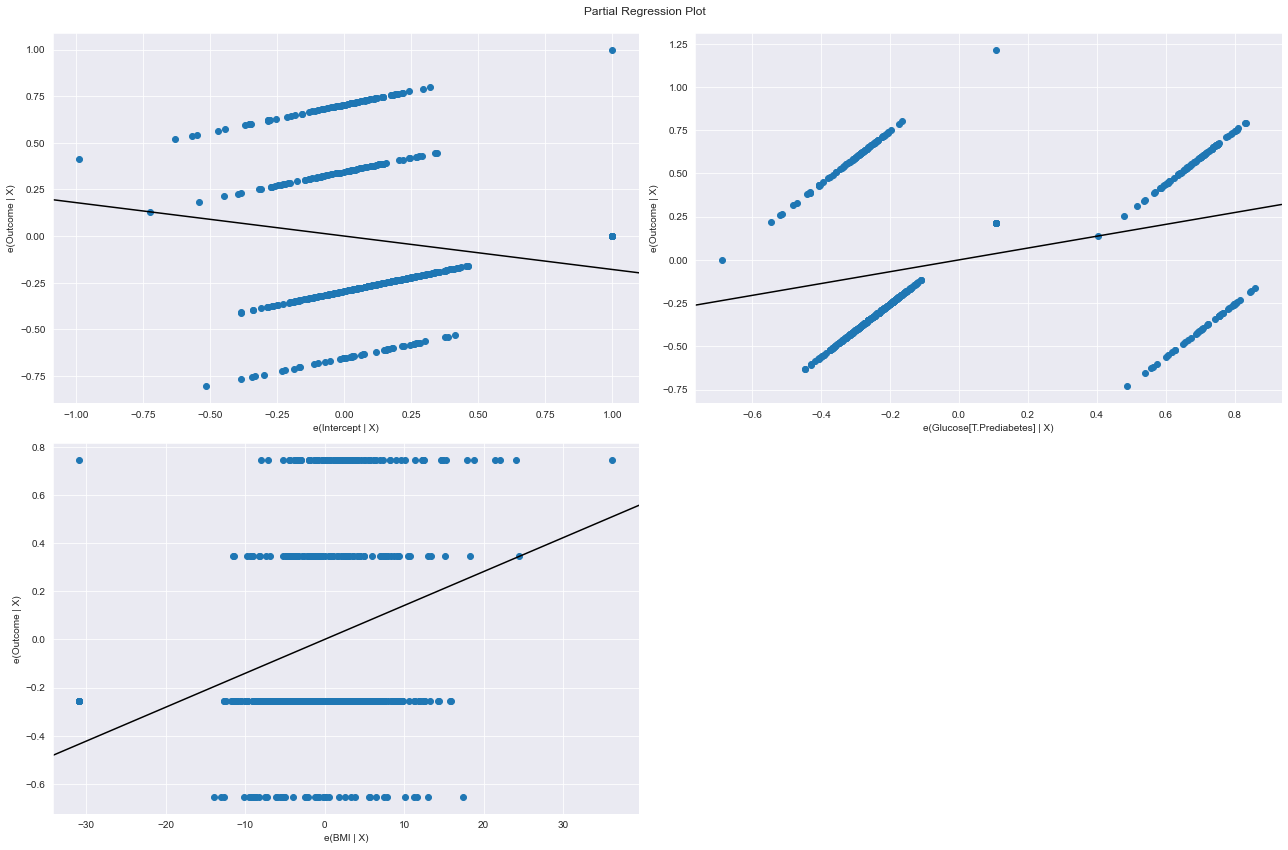

In [39]:
ancova_plot = plt.figure(figsize=(18, 12))
ancova_plot = sm.graphics.plot_partregress_grid(ancova_outcome, fig=ancova_plot)
ancova_plot.show

The graph shows a dependency between the Outcome (Diabetes) and BMI and also between the Outcome and Glucose, but when these two variables are combined (intercept), the dependency decreases drastically and even invert the direction showing that Diabetes is inversely proportional to the combination between Glucose and BMI, indicating that the dependent variable is not directly dependent on the two independent variables on this example.

In [40]:
# ANCOVA from pingouin
ancova(data=ancova_diabetes, dv='Outcome', covar='BMI', between='Glucose')

,Source,SS,DF,F,p-unc,np2
0,Glucose,11.059952,1,58.687888,9.742684e-14,0.105613
1,BMI,6.334855,1,33.614909,1.195372e-08,0.063351
2,Residual,93.661509,497,NaN,NaN,NaN


From the ANCOVA table above using pingouin library, we see same results as using ancova from ols library that the p-value (p-unc = “uncorrected p-value”) for Glucose is 9.742684e-14. Therefore, there are significant differences in outcome means p < 0.001 (9.742684e-14) among glucose whilst adjusting the effect of BMI. Since this value is less than 0.05, we can reject the null hypothesis that all glucose levels lead to diabetes and also for BMI that not all higher BMI values lead to diabetic patients. Furthermore, the covariate BMI is significant p < 0.001 (1.195372e-08) suggesting it is an important predictor of a diabetic outcome.

In [41]:
glucose = 500       # number of observations of Glucose
bmi = 500         # number of observations of BMI
glucose_m = 121.42      # mean of Glucose
bmi_m = 31.9792      # mean of BMI
glucose_s = 32.44    # standard deviation of Glucose
bmi_s = 8.203006   # standard deviation of BMI
alpha = 0.05   # significance level


s_pooled = np.sqrt(((glucose - 1)*glucose_s**2 + (bmi - 1)*bmi_s**2)/(glucose + bmi - 2))
effect_size = (glucose_m - bmi_m)/s_pooled
ratio = bmi/glucose
power = TTestIndPower().solve_power(effect_size = effect_size,
                                    power = None,
                                    nobs1 = glucose,
                                    ratio = ratio,
                                    alpha = alpha,
                                    alternative = 'smaller')

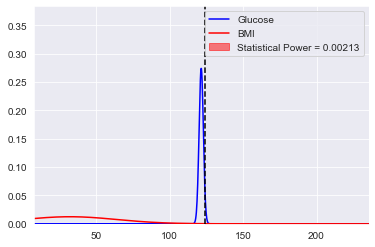

In [42]:
fig, ax = plt.subplots()

sigma1 = glucose_s/np.sqrt(glucose)
sigma2 = bmi_s/np.sqrt(bmi)

xmin = min(glucose_m - 3*glucose_s, bmi_m - 3*bmi_s)
xmax = max(glucose_m + 3*glucose_s, bmi_m + 3*bmi_s)
axis_lim = max(np.abs(glucose_m - xmax), np.abs(glucose_m - xmin))
N = 1000
x = np.linspace(glucose_m - axis_lim, glucose_m + axis_lim, N)

pdf1 = stats.t(loc = glucose_m, scale = sigma1, df = glucose).pdf(x)
ax.plot(x, pdf1, color = 'blue', label = 'Glucose')

pdf2 = stats.t(loc = bmi_m, scale = bmi_m, df = bmi).pdf(x)
ax.plot(x, pdf2, color = 'red', label = 'BMI')

limit = glucose_m + sigma1*stats.t.ppf(1 - alpha, df = glucose)
filt = x > limit
area_power = np.trapz(pdf2[filt], x[filt])
ax.fill_between(x = x[x > limit], y1 = pdf2[x > limit], color = 'red', alpha = 0.5, label = f'Statistical Power = {area_power:.5f}')
ax.axvline(x = limit, linestyle = '--', color = 'k')

ax.set_xlim(x[0], x[-1])
ax.set_ylim(0, 1.4*max(np.max(pdf1), np.max(pdf2)))

ax.legend(frameon = True)

plt.show()


The statistical power is very low on the choosen sample (< 0.01). I am choosing to not present these results as they seem inconclusive. 